In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve
from sklearn import metrics
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

# Fetch Data:

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/stay-fcsd/data-final-project/main/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Hot Encoding:
Convert categoricla features into dummy columns in the feature table with a binary value for each of the possible categorical values

In [49]:
hot_encoded_df = df.copy()

gender_column = df[["Sex"]]

hot_encoded_df['Male'] = gender_column
hot_encoded_df['Female'] = gender_column

hot_encoded_df = hot_encoded_df.drop('Sex', 1)

chest_pain_type_column = df[["ChestPainType"]]
hot_encoded_df['ATA'] = chest_pain_type_column
hot_encoded_df['TA'] = chest_pain_type_column
hot_encoded_df['ASY'] = chest_pain_type_column
hot_encoded_df['NAP'] = chest_pain_type_column
hot_encoded_df = hot_encoded_df.drop('ChestPainType', 1)

resting_ECG_column = df[["RestingECG"]]
hot_encoded_df['Normal'] = resting_ECG_column
hot_encoded_df['ST'] = resting_ECG_column
hot_encoded_df['LVH'] = resting_ECG_column
hot_encoded_df = hot_encoded_df.drop('RestingECG', 1)

ST_slope_column = df[["ST_Slope"]]

hot_encoded_df['Up'] = ST_slope_column
hot_encoded_df['Flat'] = ST_slope_column
hot_encoded_df['Down'] = ST_slope_column

hot_encoded_df = hot_encoded_df.drop('ST_Slope', 1)

hot_encoded_df['Male'] = hot_encoded_df['Male'].replace(['M'], '1')
hot_encoded_df['Male'] = hot_encoded_df['Male'].replace(['F'], '0')

hot_encoded_df['Female'] = hot_encoded_df['Female'].replace(['M'], '0')
hot_encoded_df['Female'] = hot_encoded_df['Female'].replace(['F'], '1')

hot_encoded_df['ATA'] = hot_encoded_df['ATA'].replace(['ATA'], '1')
hot_encoded_df['ATA'] = hot_encoded_df['ATA'].replace(['TA'], '0')
hot_encoded_df['ATA'] = hot_encoded_df['ATA'].replace(['ASY'], '0')
hot_encoded_df['ATA'] = hot_encoded_df['ATA'].replace(['NAP'], '0')

hot_encoded_df['TA'] = hot_encoded_df['TA'].replace(['ATA'], '0')
hot_encoded_df['TA'] = hot_encoded_df['TA'].replace(['TA'], '1')
hot_encoded_df['TA'] = hot_encoded_df['TA'].replace(['ASY'], '0')
hot_encoded_df['TA'] = hot_encoded_df['TA'].replace(['NAP'], '0')

hot_encoded_df['ASY'] = hot_encoded_df['ASY'].replace(['ATA'], '0')
hot_encoded_df['ASY'] = hot_encoded_df['ASY'].replace(['TA'], '0')
hot_encoded_df['ASY'] = hot_encoded_df['ASY'].replace(['ASY'], '1')
hot_encoded_df['ASY'] = hot_encoded_df['ASY'].replace(['NAP'], '0')

hot_encoded_df['NAP'] = hot_encoded_df['NAP'].replace(['ATA'], '0')
hot_encoded_df['NAP'] = hot_encoded_df['NAP'].replace(['TA'], '0')
hot_encoded_df['NAP'] = hot_encoded_df['NAP'].replace(['ASY'], '0')
hot_encoded_df['NAP'] = hot_encoded_df['NAP'].replace(['NAP'], '1')

hot_encoded_df['Normal'] = hot_encoded_df['Normal'].replace(['Normal'], '1')
hot_encoded_df['Normal'] = hot_encoded_df['Normal'].replace(['ST'], '0')
hot_encoded_df['Normal'] = hot_encoded_df['Normal'].replace(['LVH'], '0')

hot_encoded_df['ST'] = hot_encoded_df['ST'].replace(['Normal'], '0')
hot_encoded_df['ST'] = hot_encoded_df['ST'].replace(['ST'], '1')
hot_encoded_df['ST'] = hot_encoded_df['ST'].replace(['LVH'], '0')

hot_encoded_df['LVH'] = hot_encoded_df['LVH'].replace(['Normal'], '0')
hot_encoded_df['LVH'] = hot_encoded_df['LVH'].replace(['ST'], '0')
hot_encoded_df['LVH'] = hot_encoded_df['LVH'].replace(['LVH'], '1')

hot_encoded_df['Up'] = hot_encoded_df['Up'].replace(['Up'], '1')
hot_encoded_df['Up'] = hot_encoded_df['Up'].replace(['Flat'], '0')
hot_encoded_df['Up'] = hot_encoded_df['Up'].replace(['Down'], '0')

hot_encoded_df['Flat'] = hot_encoded_df['Flat'].replace(['Up'], '0')
hot_encoded_df['Flat'] = hot_encoded_df['Flat'].replace(['Flat'], '1')
hot_encoded_df['Flat'] = hot_encoded_df['Flat'].replace(['Down'], '0')

hot_encoded_df['Down'] = hot_encoded_df['Down'].replace(['Up'], '0')
hot_encoded_df['Down'] = hot_encoded_df['Down'].replace(['Flat'], '0')
hot_encoded_df['Down'] = hot_encoded_df['Down'].replace(['Down'], '1')

hot_encoded_df['ExerciseAngina'] = hot_encoded_df['ExerciseAngina'].replace(['Y'], '1')
hot_encoded_df['ExerciseAngina'] = hot_encoded_df['ExerciseAngina'].replace(['N'], '0')

heart_disease_column = hot_encoded_df.pop('HeartDisease')
hot_encoded_df.insert(19, 'HeartDisease', heart_disease_column);

hot_encoded_df

/var/folders/xz/gd28q0w92sqd0rq28sz11kq40000gn/T/ipykernel_18818/2609551469.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  hot_encoded_df = hot_encoded_df.drop('Sex', 1)
/var/folders/xz/gd28q0w92sqd0rq28sz11kq40000gn/T/ipykernel_18818/2609551469.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  hot_encoded_df = hot_encoded_df.drop('ChestPainType', 1)
/var/folders/xz/gd28q0w92sqd0rq28sz11kq40000gn/T/ipykernel_18818/2609551469.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  hot_encoded_df = hot_encoded_df.drop('RestingECG', 1)
/var/folders/xz/gd28q0w92sqd0rq28sz11kq40000gn/T/ipykernel_18818/2609551469.py:29: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' wi

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,Male,Female,ATA,TA,ASY,NAP,Normal,ST,LVH,Up,Flat,Down,HeartDisease
0,40,140,289,0,172,0,0.0,1,0,1,0,0,0,1,0,0,1,0,0,0
1,49,160,180,0,156,0,1.0,0,1,0,0,0,1,1,0,0,0,1,0,1
2,37,130,283,0,98,0,0.0,1,0,1,0,0,0,0,1,0,1,0,0,0
3,48,138,214,0,108,1,1.5,0,1,0,0,1,0,1,0,0,0,1,0,1
4,54,150,195,0,122,0,0.0,1,0,0,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,0,1.2,1,0,0,1,0,0,1,0,0,0,1,0,1
914,68,144,193,1,141,0,3.4,1,0,0,0,1,0,1,0,0,0,1,0,1
915,57,130,131,0,115,1,1.2,1,0,0,0,1,0,1,0,0,0,1,0,1
916,57,130,236,0,174,0,0.0,0,1,1,0,0,0,0,0,1,0,1,0,1


# Scale Data:

In [50]:
feature_cols = ['Age', 'Male', 'Female', 'ATA', 'ASY', 'TA', 'NAP', 'RestingBP', 'Cholesterol', 'FastingBS', 'Normal', 'ST','LVH', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'Up','Flat','Down']

X = hot_encoded_df[feature_cols]

scaler = StandardScaler()
scaler.fit(X.values)
heart_disease_df_scale = scaler.transform(X.values)
df_scale = pd.DataFrame(heart_disease_df_scale, columns=X.columns)
df_scale.insert(19, 'HeartDisease', heart_disease_column);

# K-Nearest Neighbor

In [51]:
X = df_scale[feature_cols]
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)
df_scale.head()

,Age,Male,Female,ATA,ASY,TA,NAP,RestingBP,Cholesterol,FastingBS,Normal,ST,LVH,MaxHR,ExerciseAngina,Oldpeak,Up,Flat,Down,HeartDisease
0,-1.433140,0.515952,-0.515952,2.075177,-1.084138,-0.229679,-0.532838,0.410909,0.825070,-0.551341,0.814275,-0.490449,-0.507478,1.382928,-0.823556,-0.832432,1.150674,-1.002181,-0.271448,0
1,-0.478484,-1.938163,1.938163,-0.481887,-1.084138,-0.229679,1.876744,1.491752,-0.171961,-0.551341,0.814275,-0.490449,-0.507478,0.754157,-0.823556,0.105664,-0.869056,0.997824,-0.271448,1
2,-1.751359,0.515952,-0.515952,2.075177,-1.084138,-0.229679,-0.532838,-0.129513,0.770188,-0.551341,-1.228087,2.038947,-0.507478,-1.525138,-0.823556,-0.832432,1.150674,-1.002181,-0.271448,0
3,-0.584556,-1.938163,1.938163,-0.481887,0.922392,-0.229679,-0.532838,0.302825,0.139040,-0.551341,0.814275,-0.490449,-0.507478,-1.132156,1.214246,0.574711,-0.869056,0.997824,-0.271448,1
4,0.051881,0.515952,-0.515952,-0.481887,-1.084138,-0.229679,1.876744,0.951331,-0.034755,-0.551341,0.814275,-0.490449,-0.507478,-0.581981,-0.823556,-0.832432,1.150674,-1.002181,-0.271448,0


In [52]:
# Create a new data frame

df_he = hot_encoded_df

In [53]:
# Create our test data

X_all_train, X_all_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [54]:
# Instaniate our Nearest Neighbor Classifier with k = 3

k = 3
my_knn_3 = KNeighborsClassifier(n_neighbors = k)

In [55]:
# Train our machine

my_knn_3.fit(X_all_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [56]:
# Predict the value

y_predict = my_knn_3.predict(X_all_test)

In [57]:
# Check the predicted value versus actual

accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.8565217391304348


In [58]:
# Trying different k-values

klist = [1,3,5,7,11,13,15,16,17,19]
acclist = []

for k in klist:
    knn_i = KNeighborsClassifier(n_neighbors = k)
    knn_i.fit(X_all_train,y_train)
    y_predict = knn_i.predict(X_all_test)
    accuracy = accuracy_score(y_test, y_predict)
    acclist.append(accuracy)

print(acclist)

[0.808695652173913, 0.8565217391304348, 0.8652173913043478, 0.8608695652173913, 0.8956521739130435, 0.8869565217391304, 0.8869565217391304, 0.8782608695652174, 0.8739130434782608, 0.8608695652173913]


# Results

We can see that for k = 11 we get an accuracy of 89.56% which is greater than 85.653% when k = 3.
Therefore going ahead we will use k = 11 to test which features are the best features.

## Using the best k(k = 11) from klist to check which feature is the best feature.

In [59]:
feature_cols = ['Age']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1 = [19]
acclist1.append(accuracy)

0.6217391304347826


In [60]:
feature_cols = ['Male']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.7


In [61]:
feature_cols = ['Female']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.7


In [62]:
feature_cols = ['ATA']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.7


In [63]:
feature_cols = ['ASY']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.7608695652173914


In [64]:
feature_cols = ['TA']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.5608695652173913


In [65]:
feature_cols = ['NAP']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.6565217391304348


In [66]:
feature_cols = ['RestingBP']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.5478260869565217


In [67]:
feature_cols = ['Cholesterol']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1 = []
acclist1.append(accuracy)

0.5739130434782609


In [68]:
feature_cols = ['FastingBS']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.6043478260869565


In [69]:
feature_cols = ['Normal']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.5782608695652174


In [70]:
feature_cols = ['ST']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.5043478260869565


In [71]:
feature_cols = ['LVH']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.5782608695652174


In [72]:
feature_cols = ['MaxHR']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.6652173913043479


In [73]:
feature_cols = ['ExerciseAngina']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.7434782608695653


In [74]:
feature_cols = ['Oldpeak']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.6782608695652174


In [75]:
feature_cols = ['Up']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.8043478260869565


In [76]:
feature_cols = ['Flat']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.7565217391304347


In [77]:
feature_cols = ['Down']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)
acclist1.append(accuracy)

0.5782608695652174


## List the best features in order by accuracy:

1st 'Up'

2nd 'ASY'

3rd 'Flat'

4th 'ExerciseAngina'

5th (tie) 'Male' & 'Female' & 'ATA'

6th 'Oldpeak'

7th 'MaxHR'

8th 'NAP' 

9th 'Age'

10th 'FastingBS'

11th (tie) 'Normal' & 'LVH' & 'Down'

12th 'Cholesterol' 

13th 'TA'

14th 'RestingBP'

15th 'ST'

## Test the best combination of the top four features.

Now we are going to test which combination of the best features gives us the highest accuracy.

In [78]:
feature_cols = ['Up','ASY']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
acclist2 = []
acclist2.append(accuracy)

In [79]:
feature_cols = ['Up','Flat']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
acclist2.append(accuracy)

In [80]:
feature_cols = ['Up','ExerciseAngina']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
acclist2.append(accuracy)

In [81]:
feature_cols = ['ASY','Flat']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
acclist2.append(accuracy)

In [82]:
feature_cols = ['ASY','ExerciseAngina']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
acclist2.append(accuracy)

In [83]:
feature_cols = ['Flat','ExerciseAngina']
X = df_he[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)
k = 11
knn_3 = KNeighborsClassifier(n_neighbors = k)
knn_3.fit(X_train, y_train)
y_predict = knn_3.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
acclist2.append(accuracy)

In [84]:
print(acclist2)

[0.8043478260869565, 0.8043478260869565, 0.8130434782608695, 0.808695652173913, 0.808695652173913, 0.808695652173913]


## 1st & 4th

We can see that the first and fourth best features being the ST_Slope = 'Up' and ExerciseAngina gives us the best accuracy. 

## Predicting the probalbility & showing the performance

In [85]:
# Instaniate our Nearest Neighbor Classifier with k = 11

k = 11
my_knn_11 = KNeighborsClassifier(n_neighbors = k)
my_knn_11.fit(X_all_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [86]:
# Predict the Probability

y_predict_proba_knn = my_knn_11.predict_proba(X_all_test)

In [87]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_proba_knn[:,1], pos_label = 1)

In [88]:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.9251608402449423


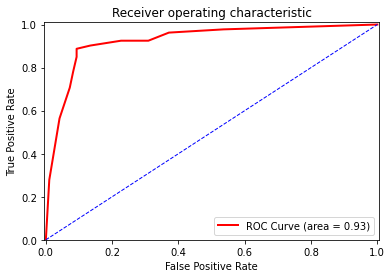

In [89]:
# Show the ROC

%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")

plt.show()

As shown thanks to the graph above we can see that nearest neighbor has only a preformance rate of 92.51%. Therefore we can only say its reliable almost 93% of the time.